In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("h1n1_vaccine_prediction.csv")
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [3]:
data.shape

(26707, 34)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [5]:
data.isnull().mean()

unique_id                    0.000000
h1n1_worry                   0.003445
h1n1_awareness               0.004343
antiviral_medication         0.002658
contact_avoidance            0.007788
bought_face_mask             0.000711
wash_hands_frequently        0.001573
avoid_large_gatherings       0.003258
reduced_outside_home_cont    0.003070
avoid_touch_face             0.004793
dr_recc_h1n1_vacc            0.080878
dr_recc_seasonal_vacc        0.080878
chronic_medic_condition      0.036358
cont_child_undr_6_mnths      0.030704
is_health_worker             0.030104
has_health_insur             0.459580
is_h1n1_vacc_effective       0.014640
is_h1n1_risky                0.014528
sick_from_h1n1_vacc          0.014790
is_seas_vacc_effective       0.017299
is_seas_risky                0.019246
sick_from_seas_vacc          0.020107
age_bracket                  0.000000
qualification                0.052683
race                         0.000000
sex                          0.000000
income_level

In [6]:
#treatment with missing values
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
for i in data.columns:
    if (data[i].isnull().sum())>0:
        data[i].fillna(data[i].mode()[0],inplace=True)

In [8]:
v = data['h1n1_vaccine'].value_counts()
v

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [9]:

#if the percentage of missing are more than 70% than we need to drop the entire column otherwise we need to impute it 

# 1.Exploratory Data Analysis

In [1]:

import plotly.graph_objects as go

labels = ['No', 'Yes']

fig = go.Figure(data=[go.Pie(labels=labels, values=v, pull=[0, 0.05])])
fig.show()

NameError: name 'v' is not defined

***Based on my hyptothesis the data will not depend on "qualification","marital_status","race","sex","housing status","employement".***

In [11]:
#lets check the string value
data_obj=data.select_dtypes(include=np.object_)
data_obj

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [12]:
data_obj.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [13]:
##label encoding(covert catogrical value 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa']
for i in cols:
    data[i]=le.fit_transform(data[i])

In [14]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0


In [15]:
data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

# checking our hyptohesis with chi-Square test

In [16]:
from sklearn.feature_selection import chi2
x1=data.drop("h1n1_vaccine",axis=1)
y1=data.h1n1_vaccine

In [17]:
#return f score and p value
f_score = chi2(x1,y1)
f_score

(array([1.27892347e+03, 2.01358892e+02, 1.11808117e+02, 4.11096977e+01,
        1.59504077e+01, 1.23284462e+02, 2.58568639e+01, 5.61483986e+00,
        8.64154522e+00, 4.30653783e+01, 3.30781019e+03, 8.92499456e+02,
        1.72886102e+02, 1.09342915e+02, 6.72405011e+02, 3.04643931e+00,
        4.95639893e+02, 1.91415123e+03, 1.15654361e+02, 2.43320341e+02,
        1.22231992e+03, 2.01581768e+00, 4.37694949e+01, 2.01459556e+01,
        1.49313640e+01, 6.77656778e+00, 1.28867110e+01, 3.05614312e+01,
        1.99380265e+01, 2.49155964e+00, 3.83927863e-03, 9.07646362e-01,
        2.84434376e-01]),
 array([4.30008095e-280, 1.05510630e-045, 3.93620890e-026, 1.43920477e-010,
        6.50237709e-005, 1.20823440e-028, 3.67694855e-007, 1.78090085e-002,
        3.28582623e-003, 5.29408499e-011, 0.00000000e+000, 4.19137320e-196,
        1.73317808e-039, 1.36504702e-025, 2.99632034e-148, 8.09143610e-002,
        8.44597327e-110, 0.00000000e+000, 5.65791678e-027, 7.42579815e-055,
        8.60189894

In [18]:
p_values=pd.Series(f_score[1],index=x1.columns)

In [19]:
irr_cols=[]
for x in p_values.index:
    if p_values[x]<=0.05:
        print(x,' :-Reject the Null Hypothesis')
    else:
        print(x,' :-Accept the Null Hypothesis')
        irr_cols.append(x)

unique_id  :-Reject the Null Hypothesis
h1n1_worry  :-Reject the Null Hypothesis
h1n1_awareness  :-Reject the Null Hypothesis
antiviral_medication  :-Reject the Null Hypothesis
contact_avoidance  :-Reject the Null Hypothesis
bought_face_mask  :-Reject the Null Hypothesis
wash_hands_frequently  :-Reject the Null Hypothesis
avoid_large_gatherings  :-Reject the Null Hypothesis
reduced_outside_home_cont  :-Reject the Null Hypothesis
avoid_touch_face  :-Reject the Null Hypothesis
dr_recc_h1n1_vacc  :-Reject the Null Hypothesis
dr_recc_seasonal_vacc  :-Reject the Null Hypothesis
chronic_medic_condition  :-Reject the Null Hypothesis
cont_child_undr_6_mnths  :-Reject the Null Hypothesis
is_health_worker  :-Reject the Null Hypothesis
has_health_insur  :-Accept the Null Hypothesis
is_h1n1_vacc_effective  :-Reject the Null Hypothesis
is_h1n1_risky  :-Reject the Null Hypothesis
sick_from_h1n1_vacc  :-Reject the Null Hypothesis
is_seas_vacc_effective  :-Reject the Null Hypothesis
is_seas_risky  :-R

# Analyze ther data

<Axes: xlabel='wash_hands_frequently', ylabel='count'>

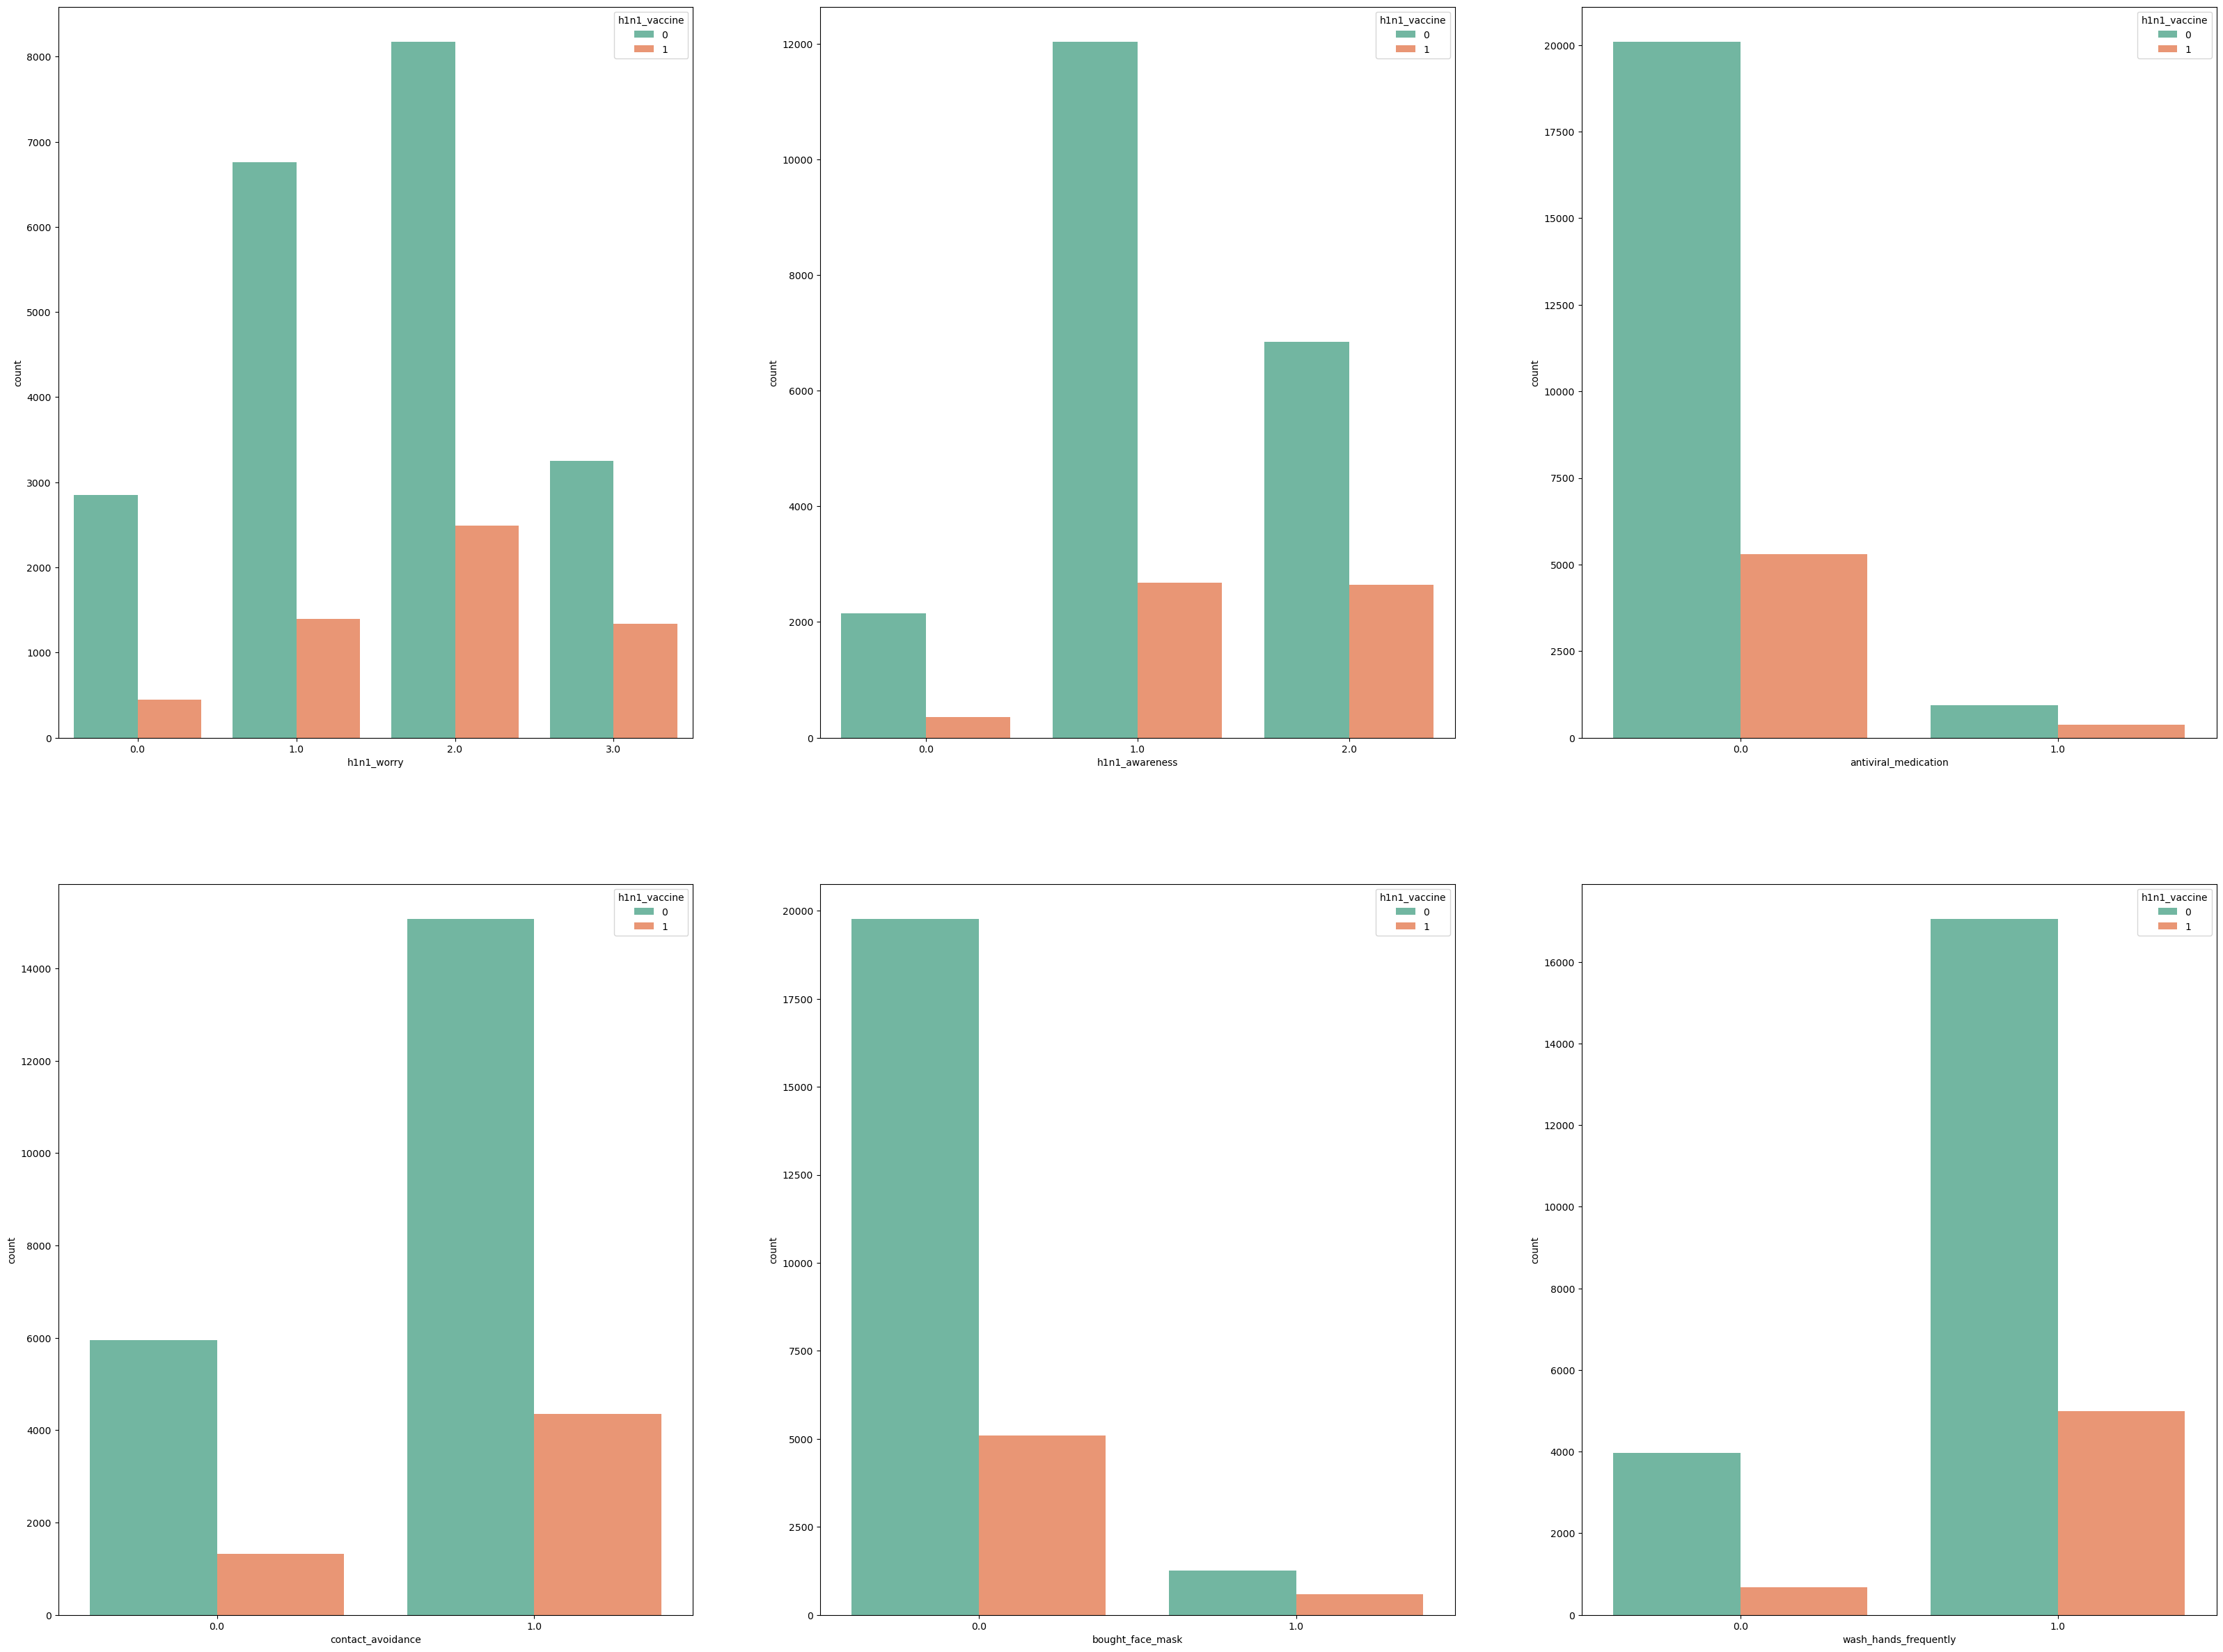

In [20]:
fig,ax=plt.subplots(2,3,figsize=(40,30))

sns.countplot(x='h1n1_worry',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[0][0])
sns.countplot(x='h1n1_awareness',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[0][1])
sns.countplot(x='antiviral_medication',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[0][2])
sns.countplot(x='contact_avoidance',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[1][0])
sns.countplot(x='bought_face_mask',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[1][1])
sns.countplot(x='wash_hands_frequently',hue='h1n1_vaccine',data=data,palette='Set2',ax=ax[1][2])

<Axes: xlabel='antiviral_medication', ylabel='count'>

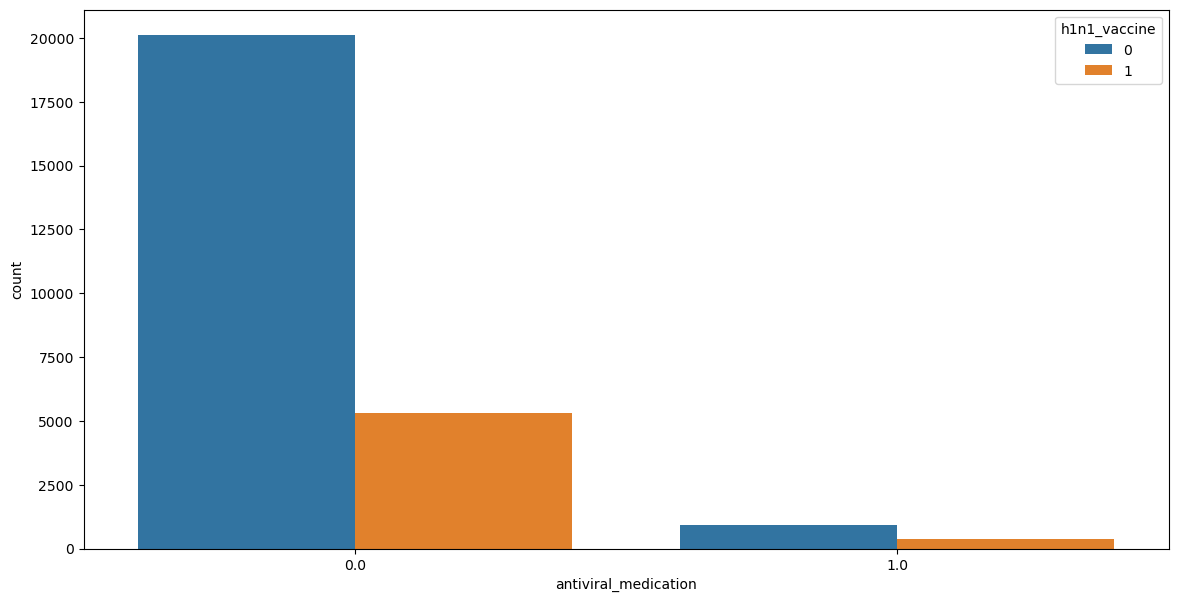

In [21]:
plt.figure(figsize=(14,7))
sns.countplot(x='antiviral_medication' ,hue='h1n1_vaccine',data=data)

In [22]:
x=data.drop(columns=['h1n1_vaccine'])
y=data['h1n1_vaccine']

In [23]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.20, random_state = 355)

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [25]:
pred = log_reg.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score,f1_score
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("F1-Score: ",f1_score(y_test, pred))
print("AUC Score: ",roc_auc_score(y_test, pred))

Accuracy Score:  0.822163983526769
F1-Score:  0.4365361803084223
AUC Score:  0.6421286932306491


Text(120.72222222222221, 0.5, 'Truth')

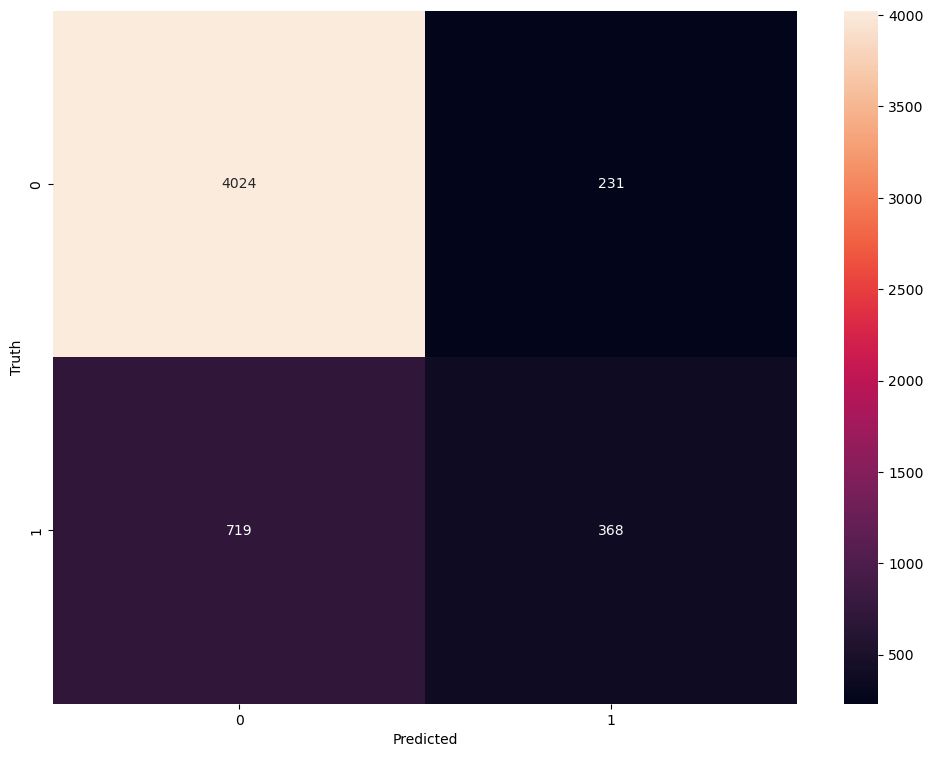

In [27]:
cm = confusion_matrix(y_test,pred)

plt.figure(figsize=(12,9))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Balancing the data using SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 23)
x_sm, y_sm = sm.fit_resample(x, y)

In [29]:
y.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [30]:
y_sm.value_counts()

0    21033
1    21033
Name: h1n1_vaccine, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = 23)

In [34]:
# Fit the balanced training data

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
pred=model.predict(x_test)

In [36]:
print("accuracy score: ",accuracy_score(y_test,pred))
print("F1-score: ",f1_score(y_test,pred))
print("AUC Score: ",roc_auc_score(y_test,pred))
    

accuracy score:  0.791670628506228
F1-score:  0.7926563830793981
AUC Score:  0.7917607714946712
